# Fake news classification on fake_or_real dataset 
## using countvectorizer, tfidf, passiveaggresiveclassifier and hashvectorizer

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier 
from sklearn.feature_extraction.text import HashingVectorizer

In [9]:
df = pd.read_csv("fake_or_real_news.csv")

In [10]:
print(df.shape) 

print(df.head())

(6335, 4)
   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


In [11]:
y = df.label
df.drop("label", axis=1)

# training and test split
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [12]:
# build vectorized classifiers
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english', min_df=5)

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, min_df=5) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [13]:
print(tfidf_vectorizer.get_feature_names()[-30:])

print(count_vectorizer.get_feature_names()[:30])

['zbigniew', 'zeal', 'zealand', 'zealot', 'zealots', 'zealous', 'zeid', 'zeitgeist', 'zelizer', 'zero', 'zeroed', 'zerohedge', 'zeroing', 'zezima', 'zika', 'zimbabwe', 'zimmerman', 'zinger', 'zingers', 'zion', 'zionism', 'zionist', 'zionists', 'zip', 'zombie', 'zombies', 'zone', 'zones', 'zuckerberg', 'zuesse']
['00', '000', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '101', '102', '103', '104', '105', '106', '107', '108', '109', '10th', '11', '110', '111', '112', '113', '114']


In [14]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)
count_df.head()

set()


,00,000,01,02,03,04,05,06,07,08,...,zionism,zionist,zionists,zip,zombie,zombies,zone,zones,zuckerberg,zuesse
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
"""
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
"""
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


accuracy:   0.889
Confusion matrix, without normalization


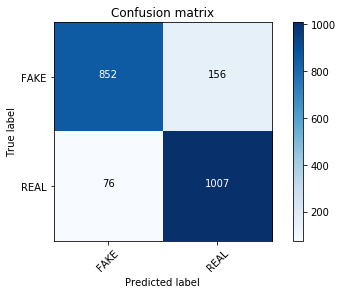

In [16]:
clf = MultinomialNB() 
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
plt.show()

accuracy:   0.880
Confusion matrix, without normalization


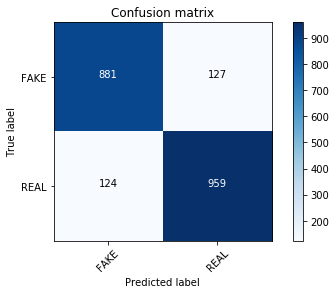

In [17]:
clf = MultinomialNB() 
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
plt.show()


## count vectorizer is outperforming tfidf because of no tuning

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.934
Confusion matrix, without normalization


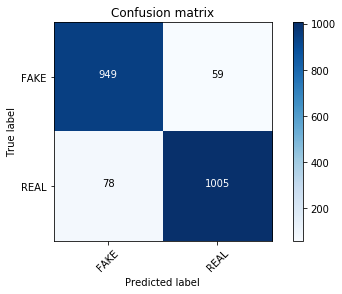

In [29]:
# testing linear models 

linear_clf = PassiveAggressiveClassifier(n_iter=50)
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
plt.show()

# pred variable stores to actual label of prediction (REAL OR FAKE)
# much better 

In [30]:
# tune alpha value with MultinomialNB to see if we can compete with linear classifier

clf = MultinomialNB(alpha=0.1)

last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.88618
Alpha: 0.10 Score: 0.89431
Alpha: 0.20 Score: 0.89335
Alpha: 0.30 Score: 0.89287
Alpha: 0.40 Score: 0.89287
Alpha: 0.50 Score: 0.89479
Alpha: 0.60 Score: 0.89335
Alpha: 0.70 Score: 0.89335
Alpha: 0.80 Score: 0.89335
Alpha: 0.90 Score: 0.89048


In [31]:
# lets see which features affect the accuracy the most (this only works for bi-models)
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print("=====================")

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

FAKE -5.10413398173 2016
FAKE -4.50127561865 october
FAKE -4.16579802859 hillary
FAKE -3.4496911254 share
FAKE -3.17139083547 article
FAKE -2.85720757606 oct
FAKE -2.79954135256 november
FAKE -2.74584496294 print
FAKE -2.55293572599 advertisement
FAKE -2.45516270861 source
FAKE -2.37958367833 email
FAKE -2.37404930366 mosul
FAKE -2.31995595827 nov
FAKE -2.26679031085 war
FAKE -2.25448054533 establishment
FAKE -2.14693479021 election
FAKE -2.07244755272 podesta
FAKE -2.01593675709 donald
FAKE -1.97826887151 corporate
FAKE -1.94933000598 brexit
FAKE -1.94155767372 dr
FAKE -1.90016737538 26
FAKE -1.86371598642 daesh
FAKE -1.86341907912 jewish
FAKE -1.85169284691 wikileaks
FAKE -1.8424725436 com
FAKE -1.83812585972 photo
FAKE -1.80565309617 ayotte
FAKE -1.79416208713 snip
FAKE -1.69348756185 mainstream
REAL 4.29418105192 said
REAL 2.62619010653 tuesday
REAL 2.57438483442 says
REAL 2.57000712417 gop
REAL 2.48483636808 cruz
REAL 2.43867295576 marriage
REAL 2.38615350727 jobs
REAL 2.276997551

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


accuracy:   0.902
Confusion matrix, without normalization


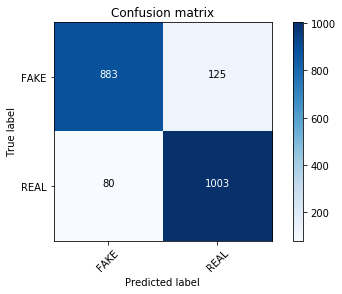

In [34]:
# hashing vectorizer has better performance and speed 

hash_vectorizer = HashingVectorizer(stop_words='english', non_negative=True)
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)
clf = MultinomialNB(alpha=.01)
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
plt.show()


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.923
Confusion matrix, without normalization


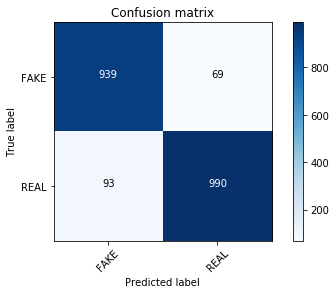

In [37]:
clf = PassiveAggressiveClassifier(n_iter=50)
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
plt.show()
